In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv("../training_data/training_dataset.csv")

print(f"Data loaded: {df.shape[0]} rows, {df.shape[1]} columns")
df.head()

Data loaded: 7 rows, 92 columns


,timestamp_utc,temp,temp_feels_like,humidity,pressure,wind_speed,wind_deg,co,no,no2,...,pm2_5_wind_disp,pm10_wind_disp,nh3_wind_disp,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos,month_sin,month_cos,ow_aqi_index
0,2025-10-08 11:33:01.071248+00:00,305.672007,308.565745,15.251163,1008.0,1.451401,300.0,120.754183,0.009949,0.166480,...,22.781815,59.236777,0.0,0.258819,-0.965926,0.974928,-0.222521,-0.866025,0.5,2.0
1,2025-10-09 11:33:01.070246+00:00,302.036229,301.192883,16.383424,1008.0,1.766286,300.0,109.188093,0.008582,0.147728,...,18.642256,41.940036,0.0,0.258819,-0.965926,0.433884,-0.900969,-0.866025,0.5,2.0
2,2025-10-10 11:33:01.067254+00:00,306.920508,299.043469,14.943952,1008.0,1.611317,300.0,130.851054,0.009078,0.154210,...,22.634948,47.327253,0.0,0.258819,-0.965926,-0.433884,-0.900969,-0.866025,0.5,3.0
3,2025-10-11 11:33:01.064248+00:00,304.980679,301.896153,14.640344,1008.0,1.575794,300.0,117.956925,0.009991,0.130036,...,21.560073,46.353248,0.0,0.258819,-0.965926,-0.974928,-0.222521,-0.866025,0.5,4.0
4,2025-10-12 11:33:01.062251+00:00,307.536223,309.144820,15.509871,1008.0,1.602895,300.0,140.440299,0.010178,0.149964,...,20.130826,44.752205,0.0,0.258819,-0.965926,-0.781831,0.623490,-0.866025,0.5,4.0


In [3]:
df.info()
df.describe().T.head(10)
df.isna().sum().sort_values(ascending=False).head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 92 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   timestamp_utc               7 non-null      object 
 1   temp                        7 non-null      float64
 2   temp_feels_like             7 non-null      float64
 3   humidity                    7 non-null      float64
 4   pressure                    7 non-null      float64
 5   wind_speed                  7 non-null      float64
 6   wind_deg                    7 non-null      float64
 7   co                          7 non-null      float64
 8   no                          7 non-null      float64
 9   no2                         7 non-null      float64
 10  o3                          7 non-null      float64
 11  so2                         7 non-null      float64
 12  pm2_5                       7 non-null      float64
 13  pm10                        7 non-null 

timestamp_utc      0
temp               0
temp_feels_like    0
humidity           0
pressure           0
wind_speed         0
wind_deg           0
co                 0
no                 0
no2                0
dtype: int64

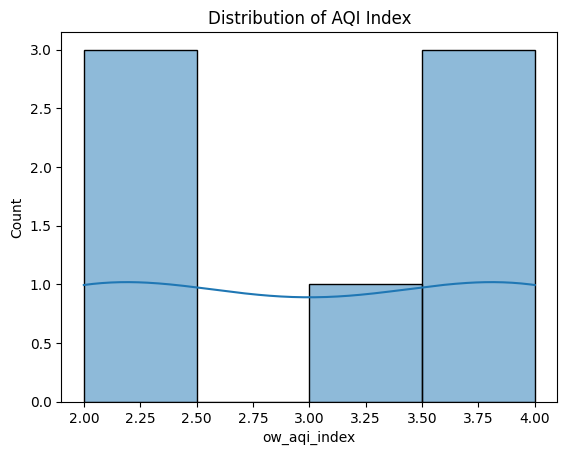

<Figure size 640x480 with 0 Axes>

In [4]:
# the target label distribution
# checking is AQI target values are balanced or spread about
sns.histplot(df['ow_aqi_index'], kde=True) # type: ignore
plt.title("Distribution of AQI Index")
plt.show()
plt.savefig("aqi_distribution.png")

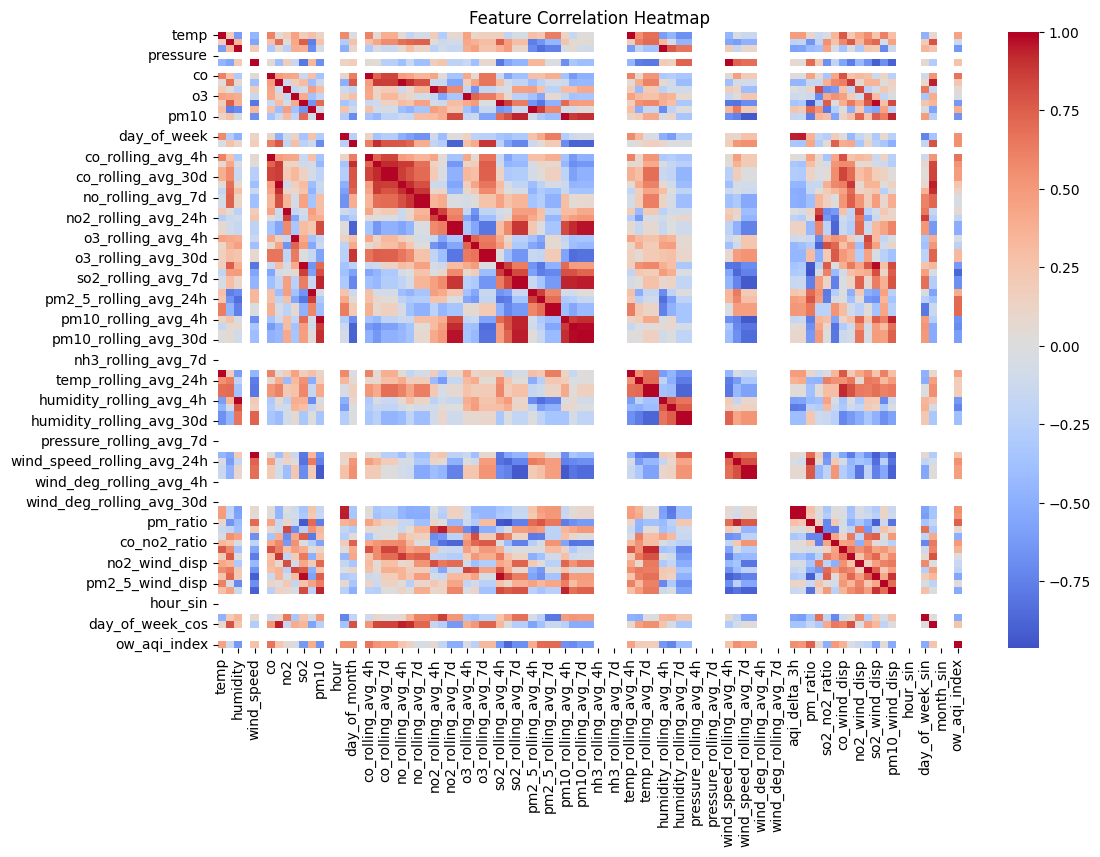

<Figure size 640x480 with 0 Axes>

In [5]:
# checking which features have the strongest correlation with the target label
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()
plt.savefig("correlation_heatmap.png")

# the top 10 correlated features
# Top correlated with AQI
corr['ow_aqi_index'].sort_values(ascending=False).head(10)
corr['ow_aqi_index'].sort_values(ascending=False).to_csv("feature_correlations.csv")

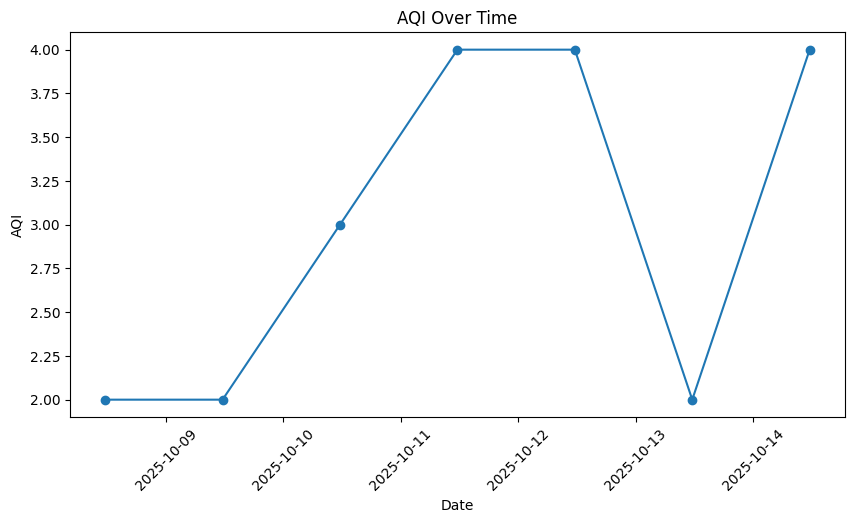

<Figure size 640x480 with 0 Axes>

In [6]:
# identifying trends over time
df['timestamp_utc'] = pd.to_datetime(df['timestamp_utc'])
plt.figure(figsize=(10, 5))
plt.plot(df['timestamp_utc'], df['ow_aqi_index'], marker='o')
plt.title("AQI Over Time")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.xticks(rotation=45)
plt.show()
plt.savefig("aqi_over_time.png")

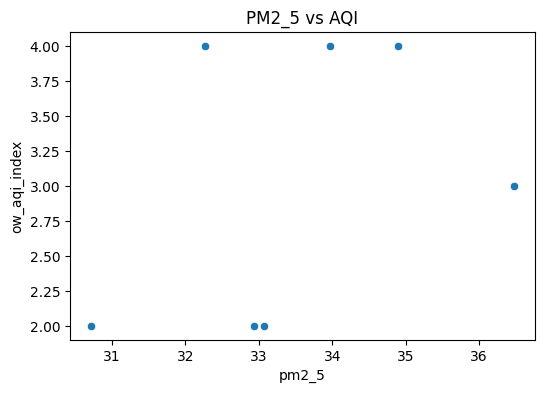

<Figure size 640x480 with 0 Axes>

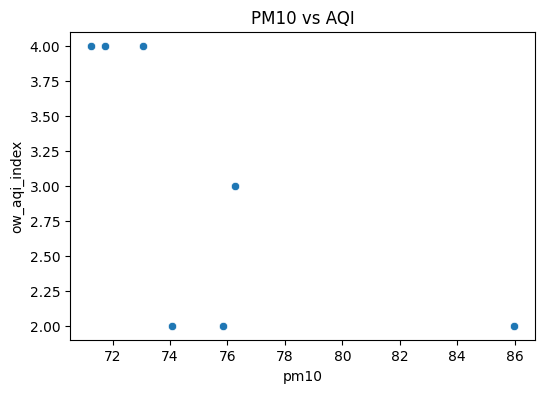

<Figure size 640x480 with 0 Axes>

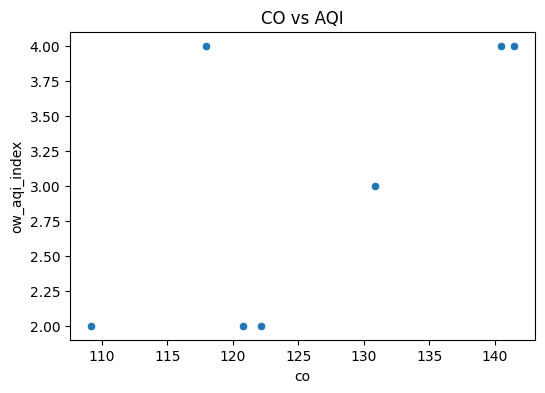

<Figure size 640x480 with 0 Axes>

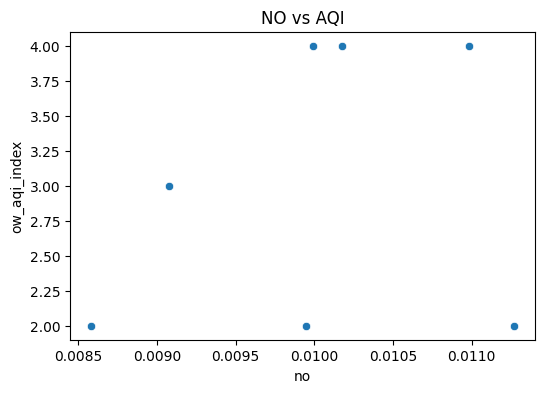

<Figure size 640x480 with 0 Axes>

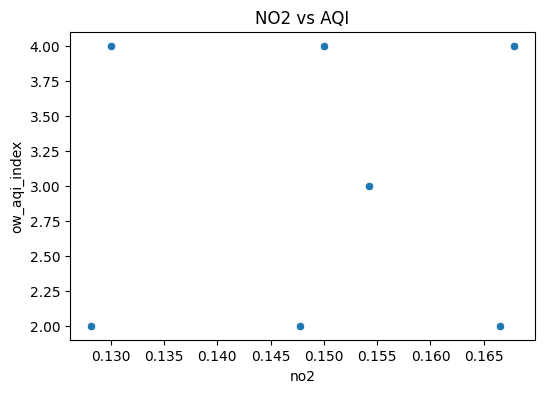

<Figure size 640x480 with 0 Axes>

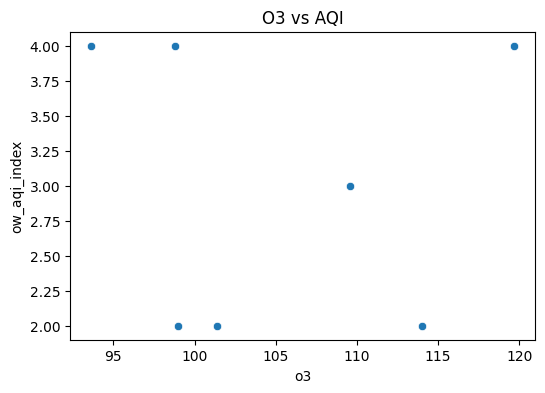

<Figure size 640x480 with 0 Axes>

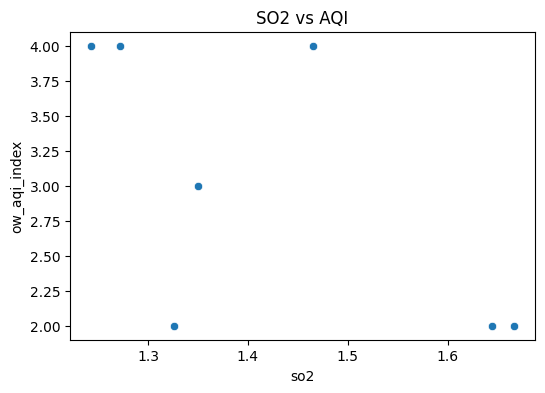

<Figure size 640x480 with 0 Axes>

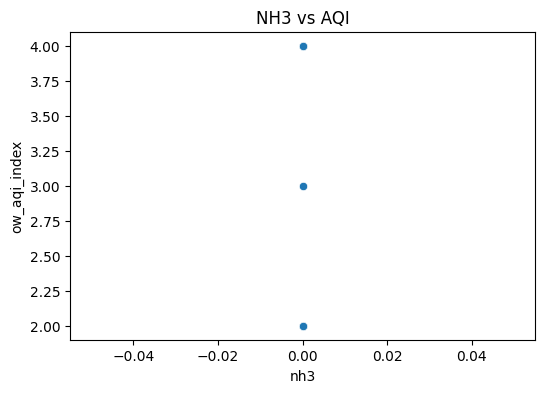

<Figure size 640x480 with 0 Axes>

In [8]:
# seeing how the pollutants relate to the AQI
pollutants = ['pm2_5', 'pm10', 'co', 'no', 'no2', 'o3', 'so2', 'nh3']
for col in pollutants:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=col, y='ow_aqi_index')
    plt.title(f"{col.upper()} vs AQI")
    plt.show()
    plt.savefig(f"pollutants_correlation/{col}_vs_aqi.png")